<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dealing-with-taxi-data" data-toc-modified-id="Dealing-with-taxi-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dealing with taxi data</a></span><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Transfer-to-shapefile" data-toc-modified-id="Transfer-to-shapefile-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transfer to shapefile</a></span></li><li><span><a href="#Only-deal-with-travel-within-austin" data-toc-modified-id="Only-deal-with-travel-within-austin-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Only deal with travel within austin</a></span></li></ul></li></ul></div>

## Dealing with taxi data
### Read data
https://data.world/andytryba/rideaustin

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
csv_name = '../Data/RideAustin_Weather.csv'
df = pd.read_csv(csv_name, encoding= 'unicode_escape')
df.head()

E:\Anaconda\envs\gpd\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,completed_on,distance_travelled,end_location_lat,end_location_long,started_on,driver_rating,rider_rating,start_zip_code,end_zip_code,charity_id,...,11/24/2016 8:35,9879,30.31,-97.74,11/24/2016 8:21,5,5.1,78701,78756,Thunder
0,11/14/2016 19:16,2300,30.26,-97.76,11/14/2016 19:11,5.0,5.0,78701,78704,NaN,...,4.955556,11/14/2016,0.0,82.0,56.0,2.0,8.9,1.0,1.0,0.0
1,11/14/2016 19:17,2977,30.29,-97.73,11/14/2016 19:08,5.0,5.0,78701,78712,NaN,...,4.955556,11/14/2016,0.0,82.0,56.0,2.0,8.9,1.0,1.0,0.0
2,11/14/2016 19:19,1298,30.27,-97.75,11/14/2016 19:13,5.0,5.0,78701,78703,5.0,...,5.000000,11/14/2016,0.0,82.0,56.0,2.0,8.9,1.0,1.0,0.0
3,11/14/2016 19:19,3442,30.26,-97.76,11/14/2016 19:13,5.0,5.0,78704,78704,NaN,...,5.000000,11/14/2016,0.0,82.0,56.0,2.0,8.9,1.0,1.0,0.0
4,11/14/2016 19:21,6635,30.32,-97.71,11/14/2016 19:12,5.0,5.0,78701,78723,NaN,...,5.000000,11/14/2016,0.0,82.0,56.0,2.0,8.9,1.0,1.0,0.0


### Transfer to shapefile

In [3]:
%%time
from shapely.geometry import Point
import fiona

start_loc = [Point(xy) for xy in zip(df.start_location_long,df.start_location_lat)]
end_loc = [Point(xy) for xy in zip(df.end_location_long,df.end_location_lat)]

Wall time: 5.12 s


### Only deal with travel within austin

In [4]:
Shapefile_path = '../Data/austin/Austin2018.shp'
austin = gpd.read_file(Shapefile_path)

<AxesSubplot:>

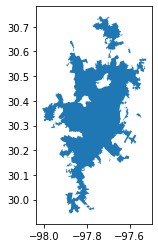

In [5]:
austin.plot()

In [6]:
%%time
remove_id = []

for index,pt in enumerate(start_loc):
    if not austin.contains(pt)[0]:
        remove_id.append(index)

for index,pt in enumerate(end_loc):
    if not austin.contains(pt)[0]:
        remove_id.append(index)

remove_id = list(set(remove_id))
len(remove_id)

Wall time: 29min 35s


8739

In [9]:
df_new = df.drop(remove_id)
df_new.to_csv('../Data/RideAustin_Weather_new.csv')